# 第10章 : 数値型の特徴量(変数)の取り扱い、機械学習のための新しい特徴量作成

数値型の特徴量(Numeric Features)について以下やる
- スケーリング
- 非線形変換
- 離散化(ビニング)(Discretization)

## スケーリング
尺度をそろえること。

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

In [18]:
x = np.array([1, 1, 2])
y = np.array([1, 4, 1])
X = x * 1000

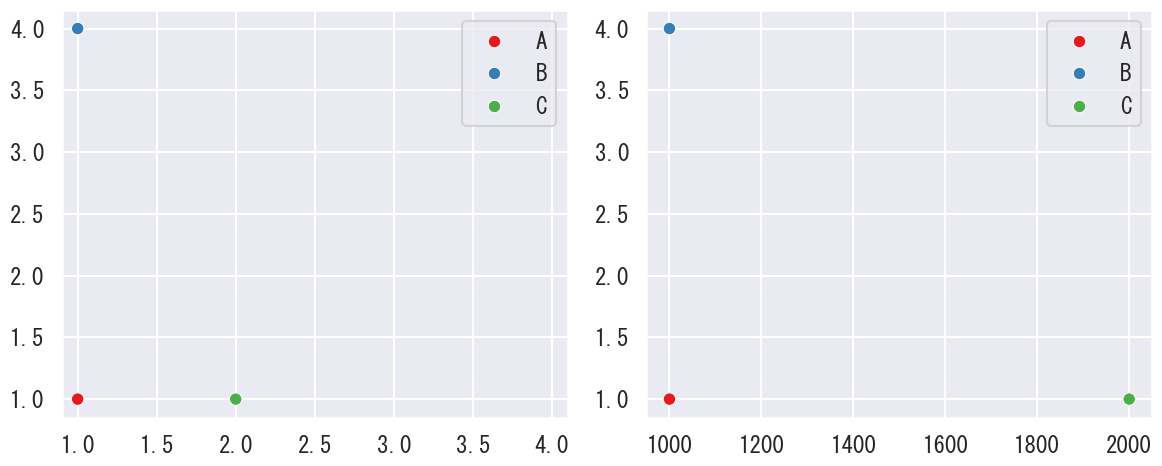

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
sns.scatterplot(x=x, y=y, ax=axes[0], hue=['A', 'B', 'C'], palette='Set1')
axes[0].set_xlim(0.9, 4.1)
sns.scatterplot(x=X, y=y, ax=axes[1], hue=['A', 'B', 'C'], palette='Set1')
plt.show()

In [20]:
# 代表的な4つのスケーラーのimport
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [21]:
sts = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
ros = RobustScaler()

In [22]:
np.random.seed(17)
random_arr = np.random.randn(300, 1)
random_arr.min(), random_arr.max()

(np.float64(-3.3999307792224305), np.float64(3.3451573949029427))

In [23]:
X = np.ones((300, 3)) * random_arr * [1, 100, 100] + 111

In [24]:
np.random.seed(17)
random_index = np.random.randint(0, 300, 10)
for i in random_index:
    X[i, 2] = X[i, 2] * 10
X[random_index]

array([[ 110.55387751,   66.38775061,  663.87750613],
       [ 110.45540322,   56.54032179,  565.4032179 ],
       [ 112.61211545,  272.21154502, 2722.1154502 ],
       [ 112.87760524,  298.76052405, 2987.60524054],
       [ 110.81209843,   92.2098425 ,  922.09842501],
       [ 110.86141475,   97.14147502,  971.41475016],
       [ 108.96400521,  -92.59947911, -925.99479107],
       [ 110.63789866,   74.78986616,  747.8986616 ],
       [ 111.00829246,  111.82924586, 1118.29245864],
       [ 110.52655195,   63.65519529,  636.55195293]])

In [25]:
X[:, 2].min(), X[:, 2].max()

(np.float64(-925.9947910720698), np.float64(2987.605240540157))

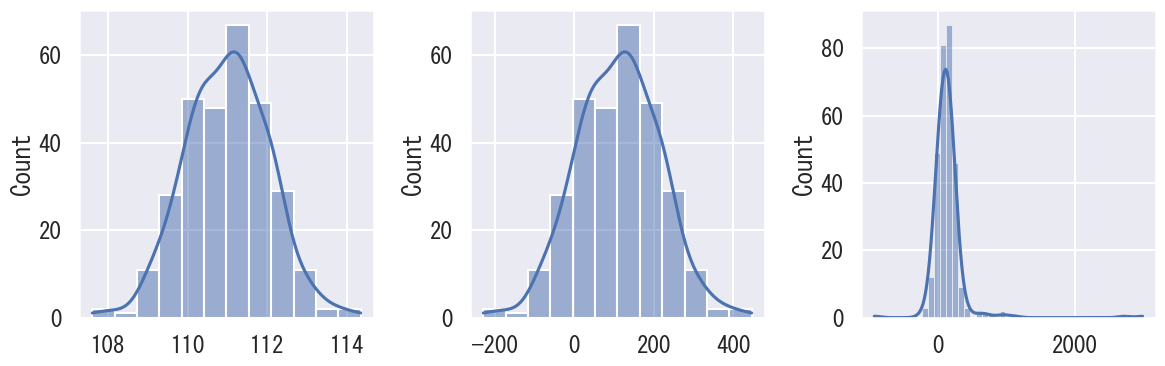

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 0], ax=axes[0], bins=12, kde=True)
sns.histplot(x=X[:, 1], ax=axes[1], bins=12, kde=True)
sns.histplot(x=X[:, 2], ax=axes[2], bins=45, kde=True)
plt.show()

### StandardScaler
StandardScalerを使うと標準化になる。つまり、平均0、標準偏差1の分布になる。

$$
X = \frac{x - \text{平均値}}{\text{標準偏差}}
$$

In [27]:
sts.fit_transform(X[:, 1].reshape(-1, 1)) # 2d arrayをいれる(300行1列に変換)

array([[ 0.26446615],
       [-1.77731823],
       [ 0.59756399],
       [ 1.09716987],
       [ 0.99357044],
       [ 1.80749672],
       [-0.10727417],
       [-0.34720588],
       [ 0.14221089],
       [-0.41972283],
       [ 2.08021265],
       [ 1.10387615],
       [-1.74300023],
       [-0.13252327],
       [ 0.51701777],
       [-1.70129052],
       [ 1.25964425],
       [-0.4538963 ],
       [-1.04680197],
       [-0.23981868],
       [-0.94146365],
       [ 0.98789668],
       [ 0.47054034],
       [-0.42821563],
       [-0.77288664],
       [ 0.12553154],
       [-1.16210034],
       [ 0.1530535 ],
       [-0.72388804],
       [ 0.3350172 ],
       [ 0.93641612],
       [-0.13303677],
       [ 0.09926638],
       [ 0.28777407],
       [ 0.92747008],
       [ 0.8330111 ],
       [ 0.5437927 ],
       [ 0.44557833],
       [-1.11688646],
       [-1.95110056],
       [-1.10734317],
       [ 3.20502295],
       [ 0.12118087],
       [-0.66539664],
       [ 0.53410677],
       [ 0

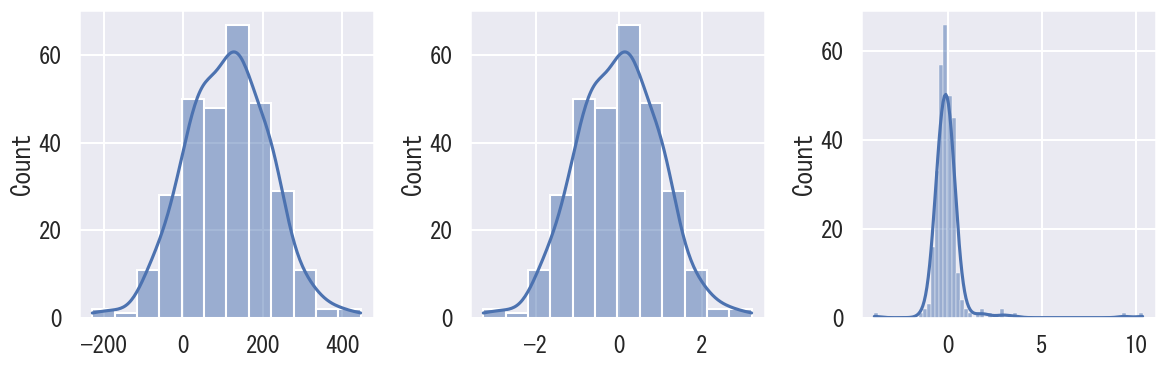

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=sts.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=sts.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True)
plt.show()

### MinMaxScaler
正規化。最小0, 最大1の分布になるようスケーリングする

$$
X = \frac{x - \text{最小値}}{\text{最大値} - \text{最小値}}
$$

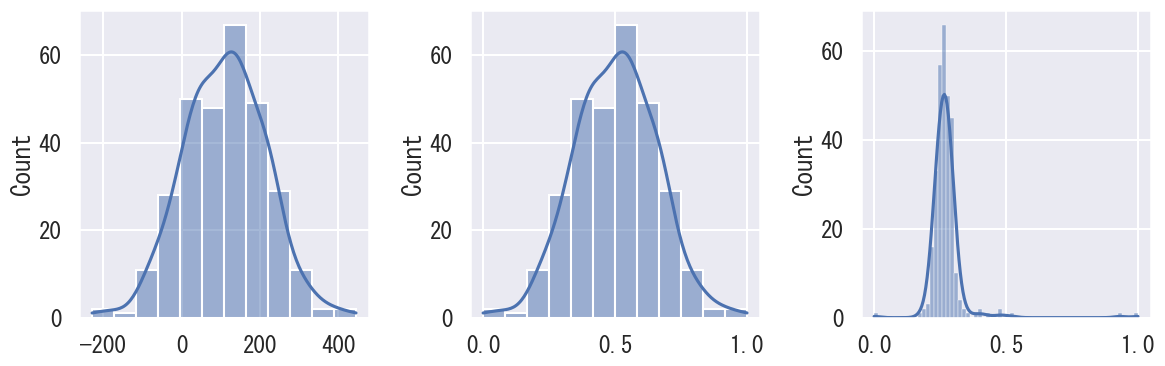

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=mms.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=mms.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True)
plt.show()

### MaxAbsScaler
-1から1の分布になるようにスケーリングする。少なくとも-1または1の値をもつ。

$$
X = \frac{x}{絶対値の最大値}
$$

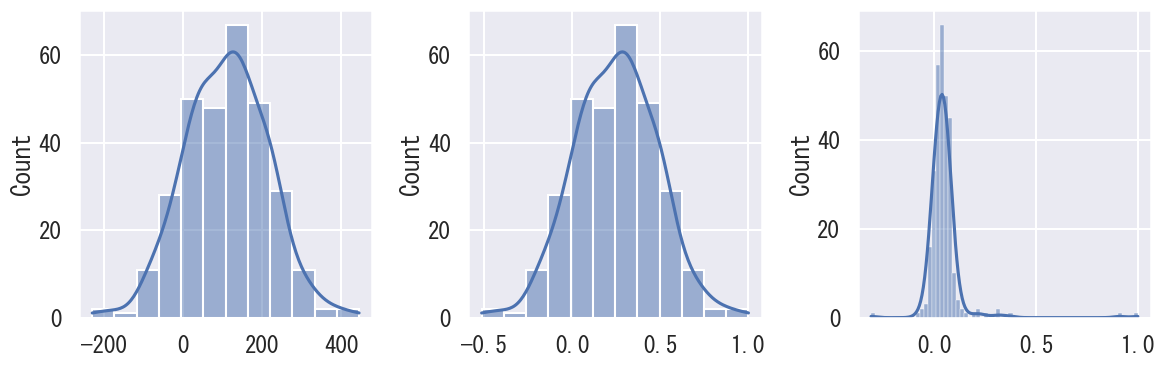

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=mas.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=mas.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True)
plt.show()

### RobustScaler
中央値を0にして、外れ値を除く大部分を対象にスケーリングする。

$$
X = \frac{x- \text{中央値}}{\text{四分位範囲}}
$$

$$
X = \frac{x - Q_2}{Q_3 - Q_1}
$$

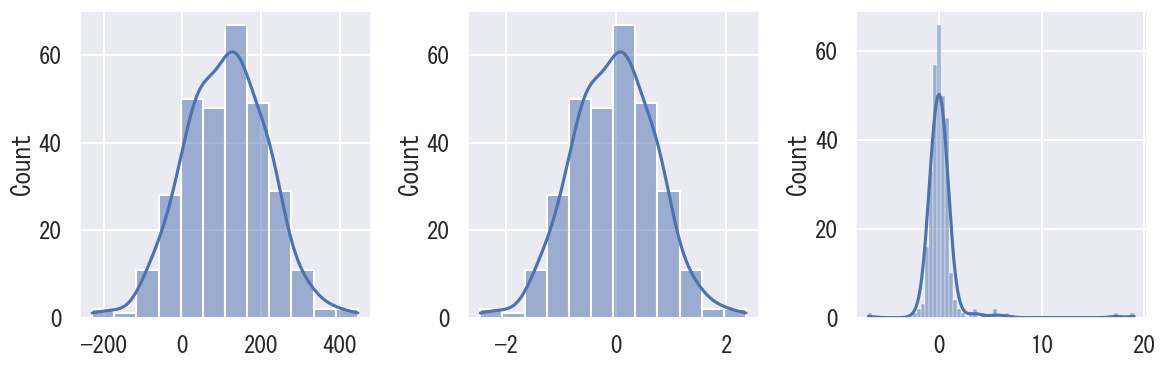

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], ax=axes[0], bins=12, kde=True)
sns.histplot(x=ros.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), ax=axes[1], bins=12, kde=True)
sns.histplot(x=ros.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), ax=axes[2], bins=66, kde=True)
plt.show()

## 非線形変換

In [34]:
# ボストン住宅価格のデータセット読み込み
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=feature_names)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_22260\126685620.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Quantile TransformerとPowerTransformer

In [36]:
np.quantile(df['RM'], [0, 0.25, 0.5, 0.95, 1]) # 最小値, Q1, 中央値, 全体の95%目の数値, 最大値を取得できる

array([3.561 , 5.8855, 6.2085, 7.5875, 8.78  ])

In [37]:
# これも同じ
np.percentile(df['RM'], [0, 25, 50, 95, 100])

array([3.561 , 5.8855, 6.2085, 7.5875, 8.78  ])

In [44]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

qut_n = QuantileTransformer(output_distribution='normal', n_quantiles=506) # 正規分布に変換
qut_u = QuantileTransformer(output_distribution='uniform', n_quantiles=506) # 一様分布に変換
pot = PowerTransformer()

In [45]:
def plots_transformed(feature):
    qut_n_arr = qut_n.fit_transform(df[[feature]]).flatten()
    qut_u_arr = qut_u.fit_transform(df[[feature]]).flatten()
    pot_arr = pot.fit_transform(df[[feature]]).flatten()

    fig, axes = plt.subplots(1, 4, figsize=(18, 5), tight_layout=True)
    sns.histplot(x=df[feature], kde=True, bins=12, ax=axes[0], shrink=0.9)
    axes[0].set_title(feature)
    axes[0].set_xlabel('')
    sns.histplot(x=qut_n_arr, kde=True, bins=12, ax=axes[1], shrink=0.9)
    axes[1].set_title('Quantile_normal')
    sns.histplot(x=qut_u_arr, kde=True, bins=12, ax=axes[2], shrink=0.9)
    axes[2].set_title('Quantile_uniform')
    sns.histplot(x=pot_arr, kde=True, bins=12, ax=axes[3], shrink=0.9)
    axes[3].set_title('Power')

    plt.show()



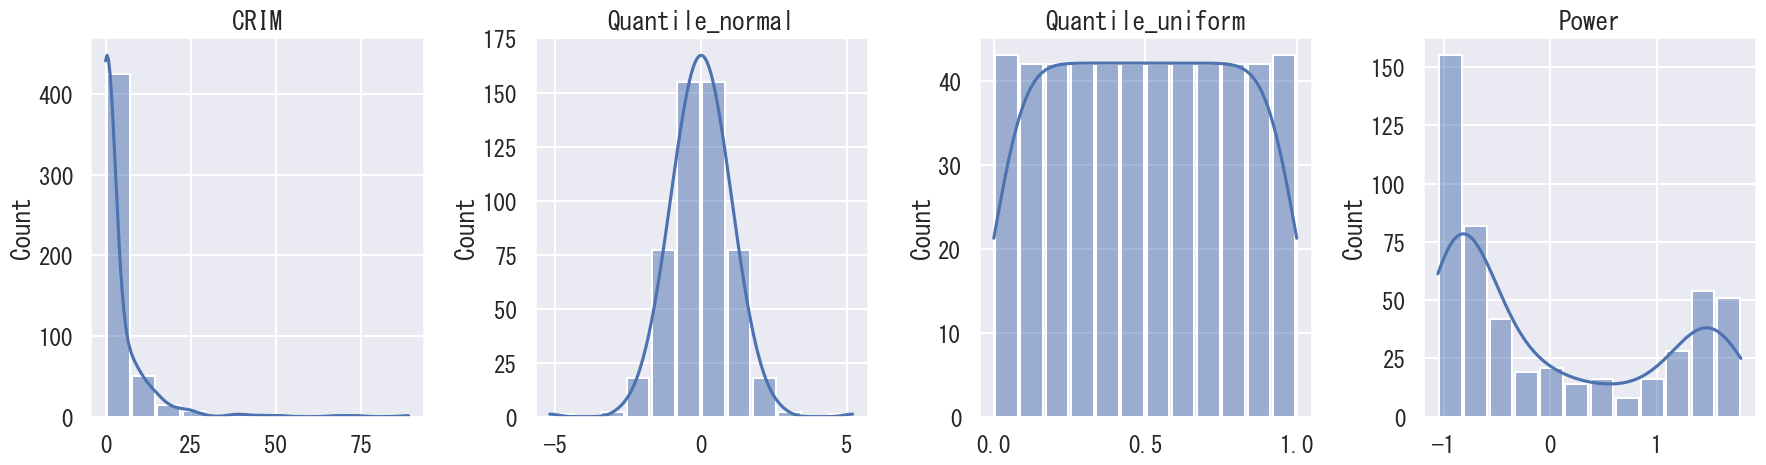

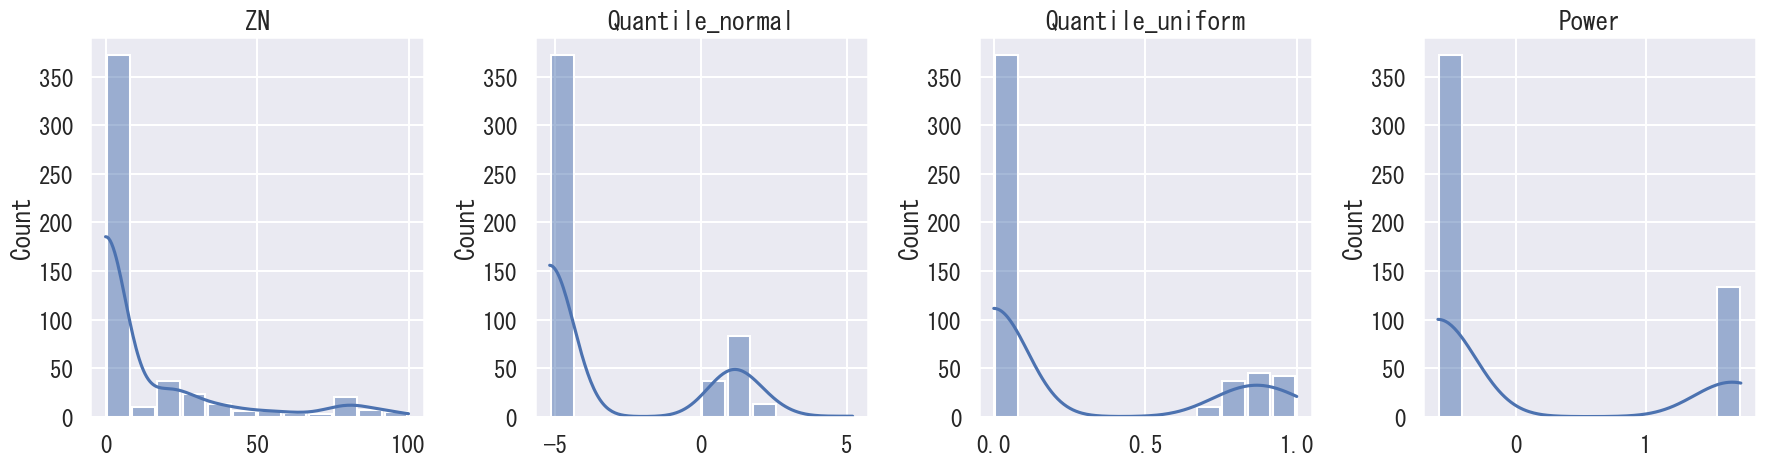

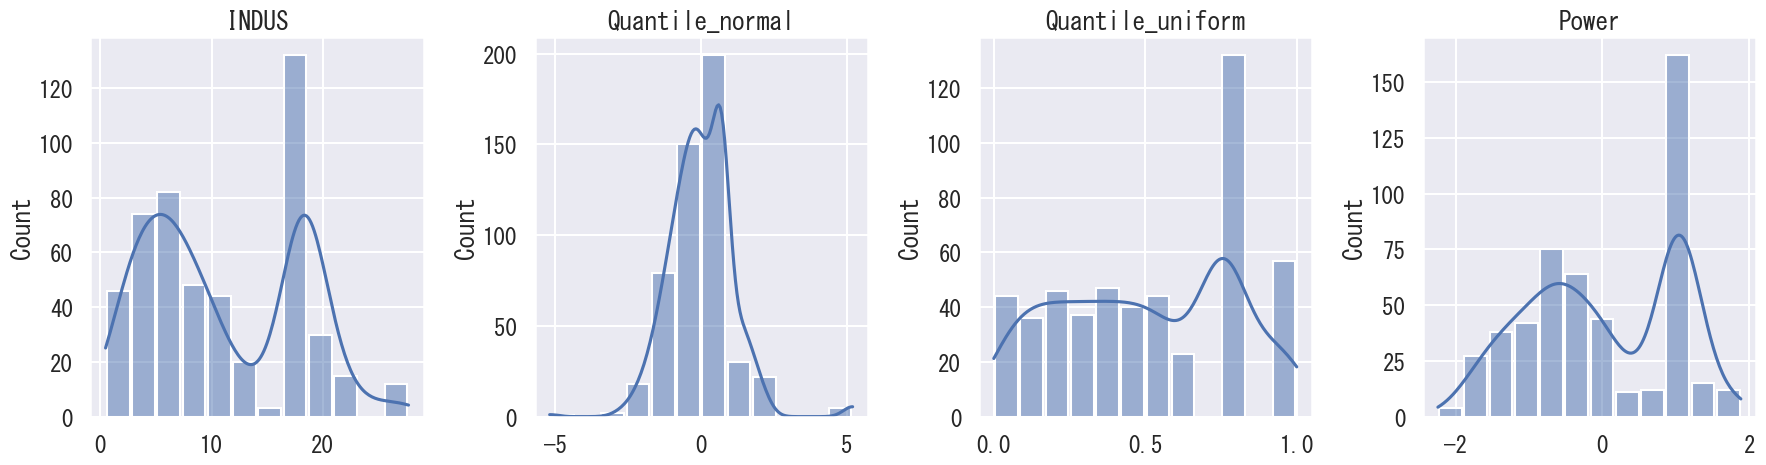

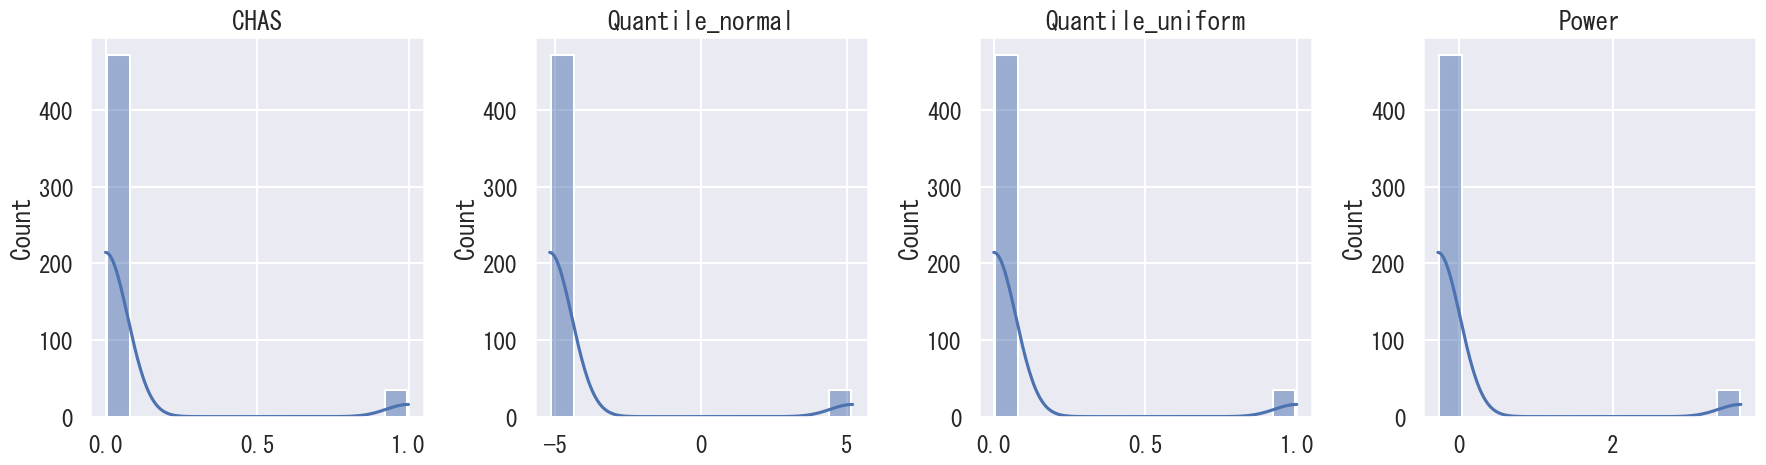

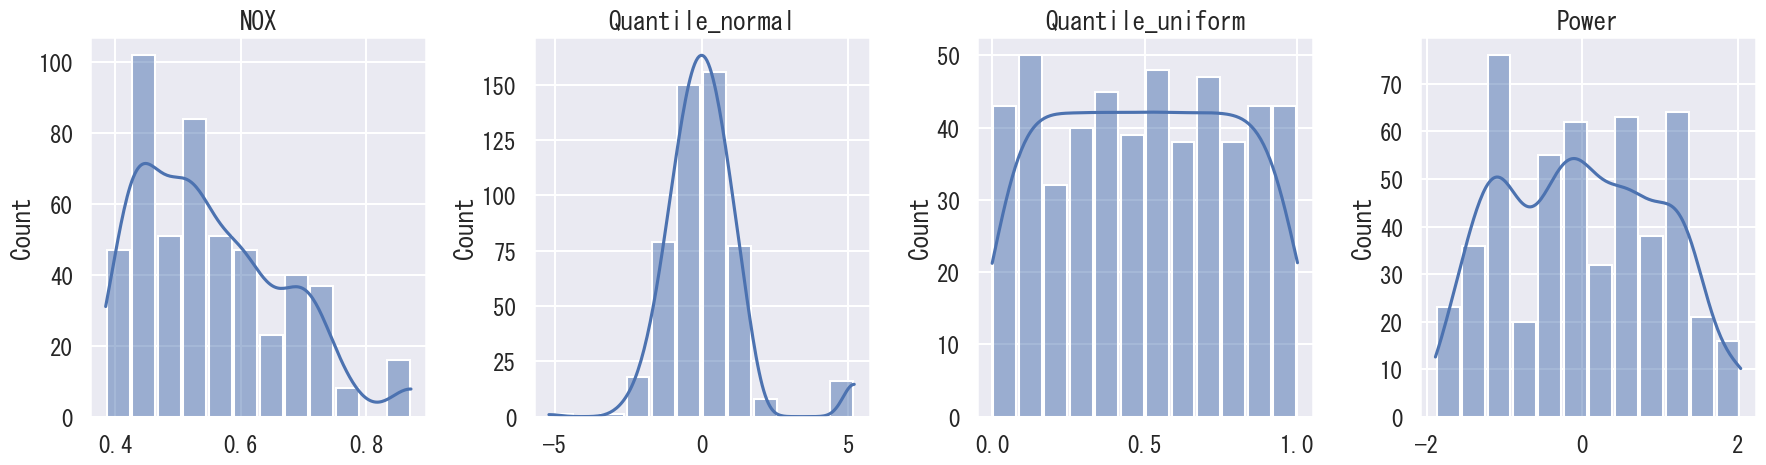

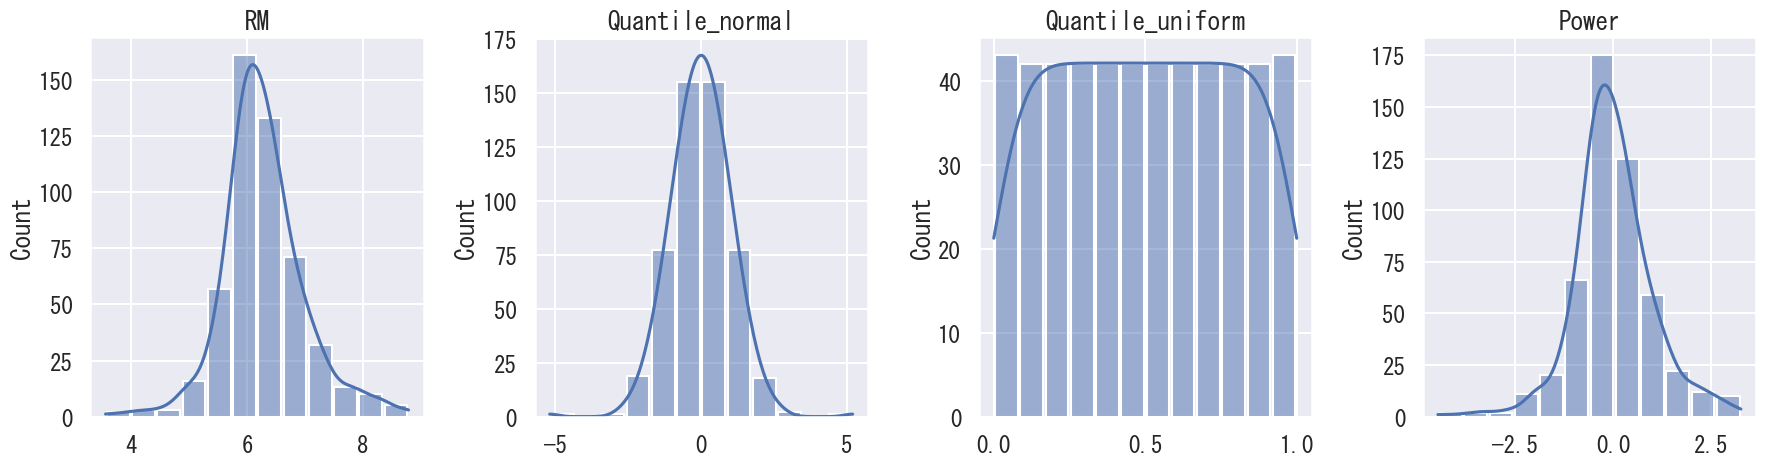

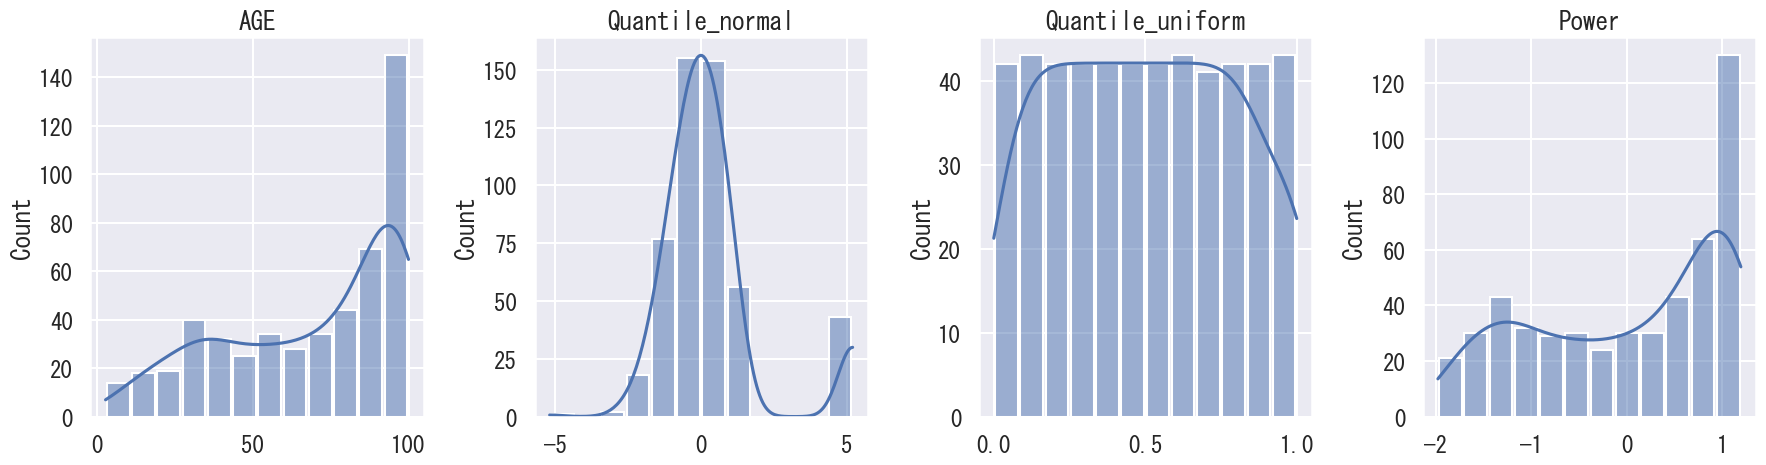

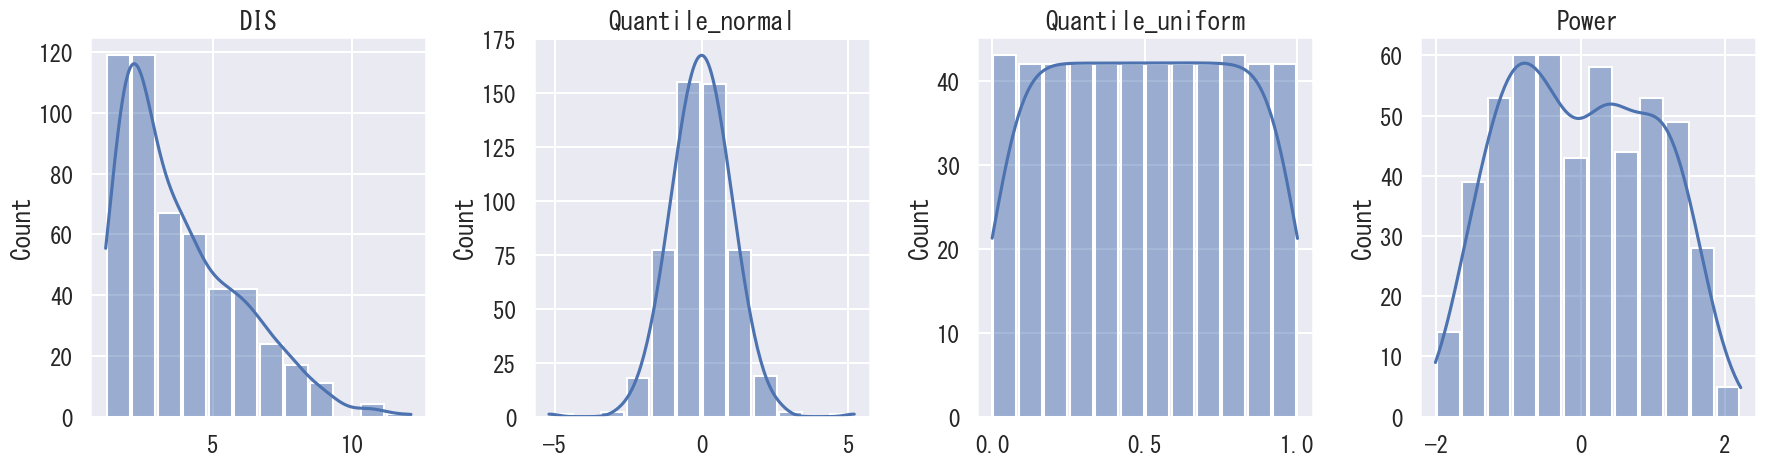

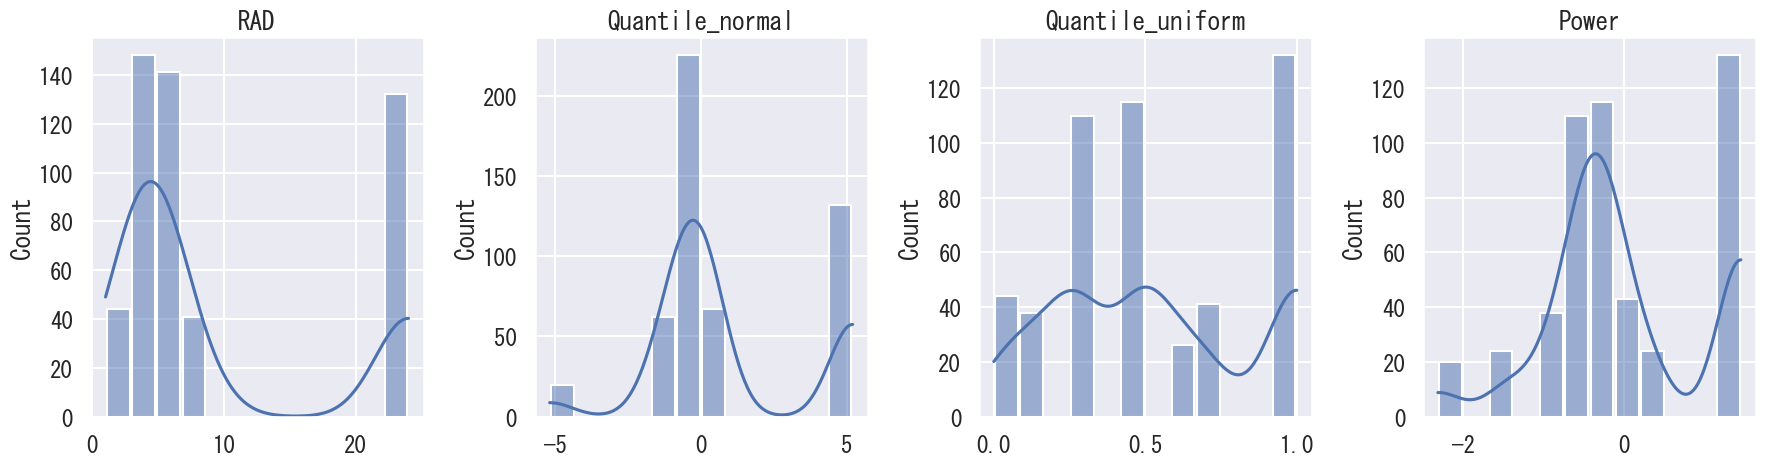

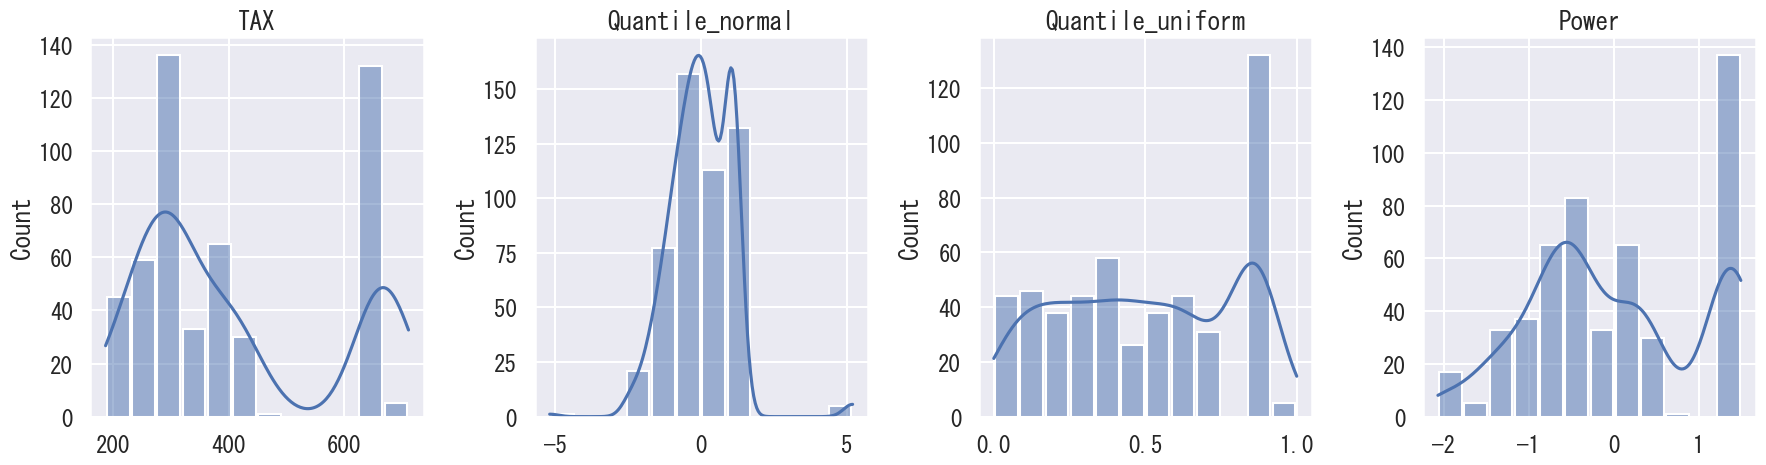

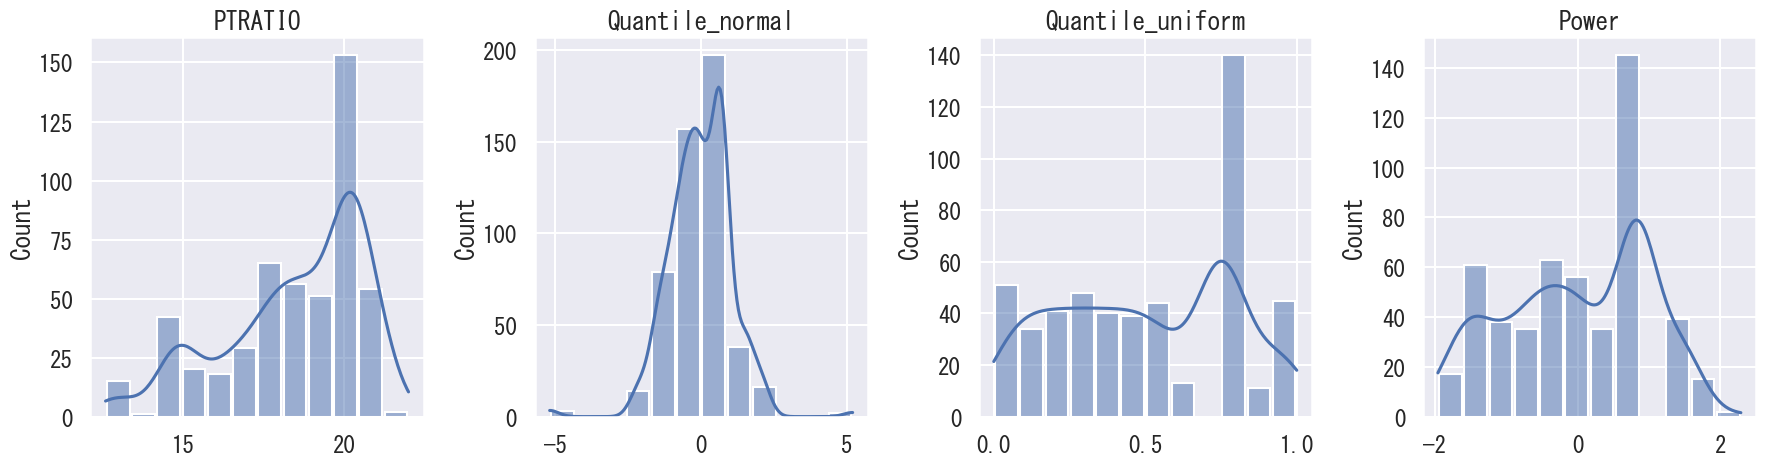

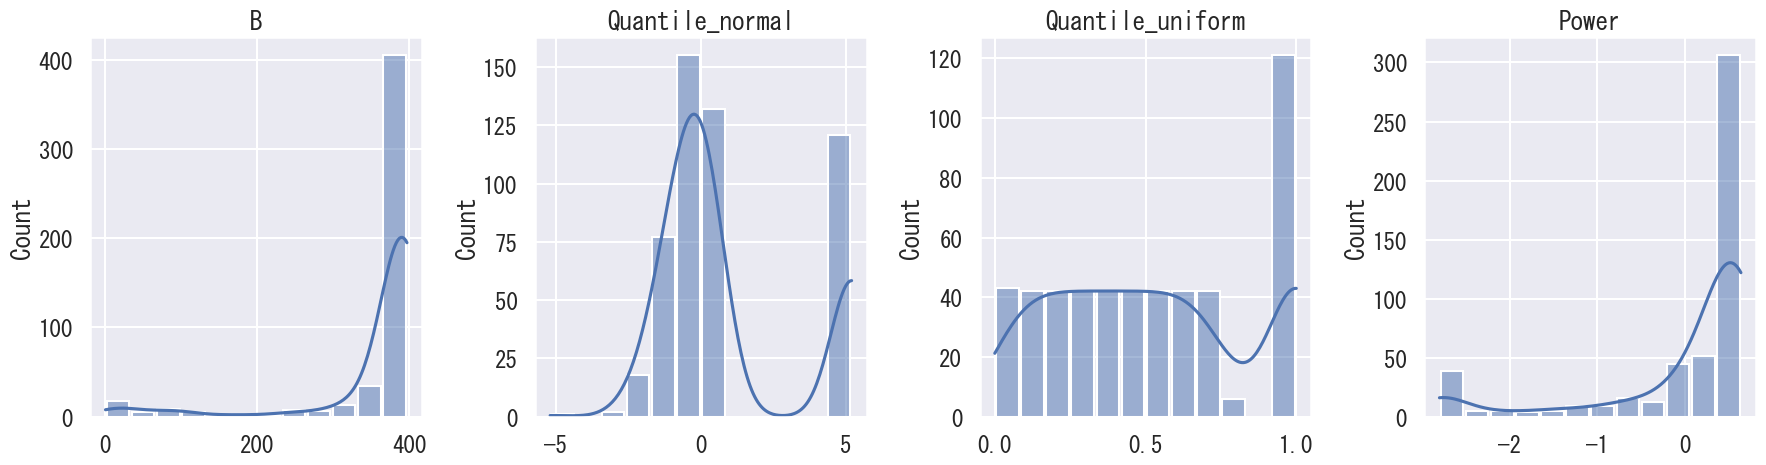

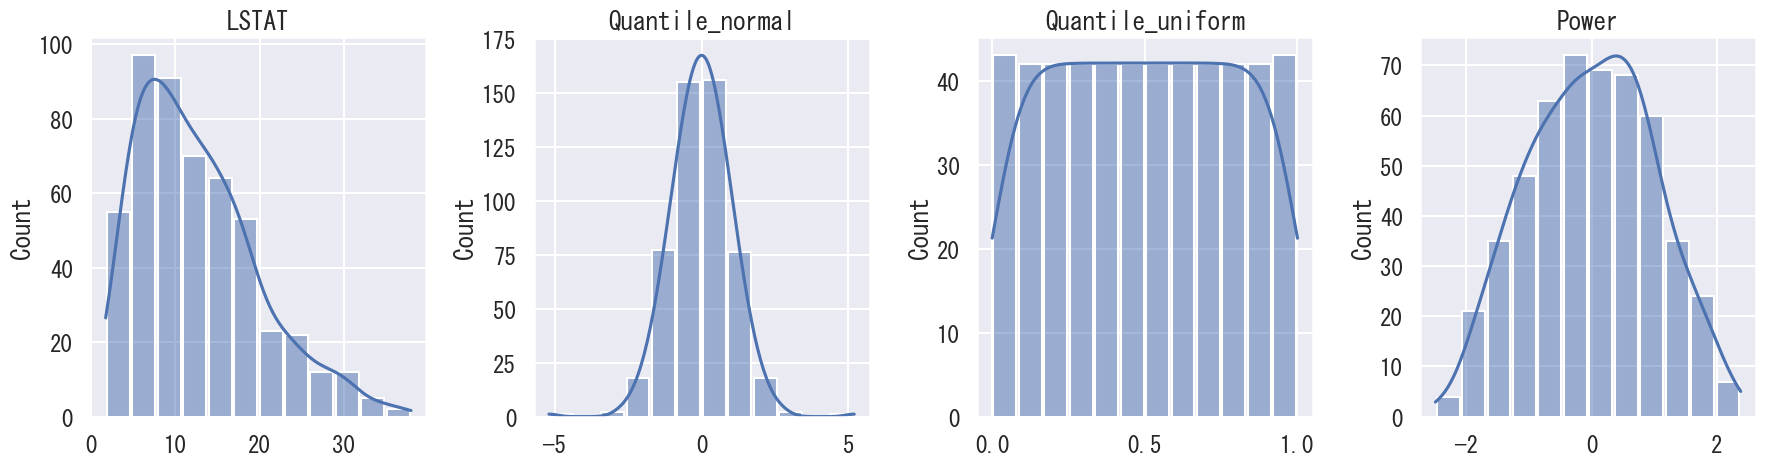

In [46]:
for feature in df.columns:
    plots_transformed(feature)

## 離散化

`KBinsDescretizer`で離散化を行う

In [47]:
x = df[['RM']].values
x.min(), x.max()

(np.float64(3.561), np.float64(8.78))

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer_q = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
discretizer_u = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')

In [50]:
discretizer_q.fit(x)
discretizer_u.fit(x)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [51]:
discretizer_q.transform(x)[:5]

array([[3.],
       [3.],
       [4.],
       [4.],
       [4.]])

In [52]:
discretizer_u.transform(x)[:5]

array([[2.],
       [2.],
       [3.],
       [3.],
       [3.]])